In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples = 1000 , n_features = 2 , n_classes = 2 , n_clusters_per_class = 2 , n_redundant = 0)

In [4]:
pd.DataFrame(X)[0]

,0
0,2.456664
1,1.590493
2,0.045260
3,-0.473693
4,0.469193
...,...
995,-1.122908
996,1.148575
997,-0.822072
998,-2.998113


<Axes: xlabel='0', ylabel='1'>

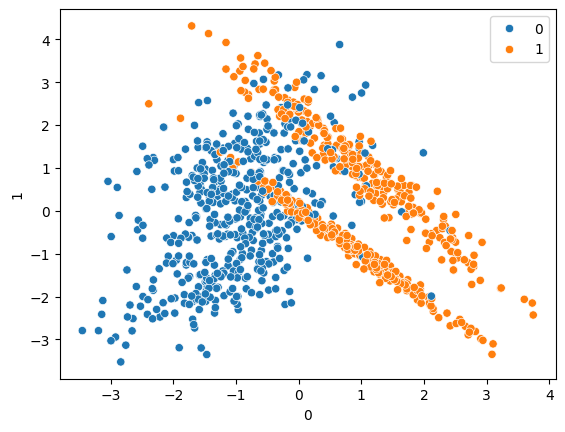

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0] , y = pd.DataFrame(X)[1] , hue = y)
# sns.scatterplot(x=data['value'],y=data['time'],hue=data['crop_type'])

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state = 10)

In [8]:
from sklearn.svm import SVC

In [9]:
svc = SVC(kernel = 'linear')

In [12]:
svc.fit(X_train , y_train)

SVC(kernel='linear')

In [13]:
svc.coef_

array([[1.67043097, 0.36155814]])

In [14]:
## Prediction
y_pred = svc.predict(X_test)

In [15]:
from sklearn.metrics import classification_report , confusion_matrix

In [16]:
print(classification_report(y_test , y_pred))

print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       120
           1       0.83      0.91      0.86       130

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250

[[ 95  25]
 [ 12 118]]


In [23]:
rbf = SVC(kernel = 'rbf')

rbf.fit(X_train,y_train)

## Prediction
y_pred1 = rbf.predict(X_test)

print(classification_report(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       120
           1       0.84      0.94      0.88       130

    accuracy                           0.87       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.87      0.87       250

[[ 96  24]
 [  8 122]]


In [24]:
polynomial = SVC(kernel = 'poly')

polynomial.fit(X_train , y_train)

## Prediction
y_pred2 = polynomial.predict(X_test)

print(classification_report(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       120
           1       0.85      0.85      0.85       130

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[101  19]
 [ 19 111]]


In [26]:
sigmoid = SVC(kernel = 'sigmoid')

sigmoid.fit(X_train , y_train)

## Prediction
y_pred3 = sigmoid.predict(X_test)
print(classification_report(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))

sigmoid.intercept_

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       120
           1       0.82      0.88      0.85       130

    accuracy                           0.84       250
   macro avg       0.84      0.83      0.83       250
weighted avg       0.84      0.84      0.84       250

[[ 94  26]
 [ 15 115]]


array([1.35852531])

# ***Hyperparameters Tuning With SVC***

In [27]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [29]:
grid = GridSearchCV(SVC() , param_grid = param_grid , refit = True , cv = 5 , verbose = 3)

grid.fit(X_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [30]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [31]:
## Prediction
y_pred4 = grid.predict(X_test)

print(classification_report(y_test , y_pred4))
print(confusion_matrix(y_test , y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       120
           1       0.90      0.95      0.93       130

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[106  14]
 [  6 124]]
